In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
# 98 and 99 are nan
patient_data = pd.read_csv("patient.csv", na_values=[98,99])
# Columns not of use for this model
patient_data.drop(columns=['pregnant', 'another_case', 'patient_type', 'asthma', 'immunosuppression', 'chronic_kidney_failure', 'obesity', 'cardiovascular'], inplace=True)
patient_data.head(20)

,sex,intubated,pneumonia,age,diabetes,copd,hypertension,other_diseases,smoker,outcome,icu,death_date
0,2,97.0,2.0,42.0,2.0,2.0,2.0,2.0,2.0,1,97.0,9999-99-99
1,1,97.0,2.0,51.0,2.0,2.0,2.0,2.0,2.0,1,97.0,9999-99-99
2,2,2.0,2.0,51.0,1.0,2.0,1.0,2.0,2.0,1,2.0,9999-99-99
3,2,2.0,2.0,57.0,1.0,2.0,2.0,2.0,2.0,1,2.0,2020-04-01
4,1,2.0,2.0,44.0,1.0,2.0,2.0,2.0,2.0,2,2.0,9999-99-99
5,2,2.0,1.0,40.0,2.0,2.0,2.0,NaN,2.0,2,2.0,9999-99-99
6,1,97.0,2.0,40.0,2.0,2.0,2.0,2.0,2.0,2,97.0,9999-99-99
7,2,2.0,1.0,89.0,2.0,1.0,2.0,2.0,2.0,2,2.0,9999-99-99
8,1,2.0,1.0,34.0,2.0,2.0,2.0,2.0,2.0,3,2.0,9999-99-99
9,2,97.0,2.0,55.0,1.0,2.0,1.0,2.0,2.0,1,97.0,9999-99-99


In [20]:
patient_data['outcome'].value_counts()

2    59704
1    23471
3    12664
Name: outcome, dtype: int64

#### Outcome of 3 corresponds to covid results pending so let's delete those rows

In [21]:
patient_data = patient_data[patient_data.outcome!=3]
patient_data.head()

,sex,intubated,pneumonia,age,diabetes,copd,hypertension,other_diseases,smoker,outcome,icu,death_date
0,2,97.0,2.0,42.0,2.0,2.0,2.0,2.0,2.0,1,97.0,9999-99-99
1,1,97.0,2.0,51.0,2.0,2.0,2.0,2.0,2.0,1,97.0,9999-99-99
2,2,2.0,2.0,51.0,1.0,2.0,1.0,2.0,2.0,1,2.0,9999-99-99
3,2,2.0,2.0,57.0,1.0,2.0,2.0,2.0,2.0,1,2.0,2020-04-01
4,1,2.0,2.0,44.0,1.0,2.0,2.0,2.0,2.0,2,2.0,9999-99-99


In [22]:
patient_data = patient_data.dropna()
patient_data.head()

,sex,intubated,pneumonia,age,diabetes,copd,hypertension,other_diseases,smoker,outcome,icu,death_date
0,2,97.0,2.0,42.0,2.0,2.0,2.0,2.0,2.0,1,97.0,9999-99-99
1,1,97.0,2.0,51.0,2.0,2.0,2.0,2.0,2.0,1,97.0,9999-99-99
2,2,2.0,2.0,51.0,1.0,2.0,1.0,2.0,2.0,1,2.0,9999-99-99
3,2,2.0,2.0,57.0,1.0,2.0,2.0,2.0,2.0,1,2.0,2020-04-01
4,1,2.0,2.0,44.0,1.0,2.0,2.0,2.0,2.0,2,2.0,9999-99-99


#### 97 for icu and intubated mean not applicable thus, will be removed

In [23]:
patient_data = patient_data[patient_data.icu!=97]
patient_data = patient_data[patient_data.intubated!=97]
patient_data.outcome.value_counts()

2    12000
1     9133
Name: outcome, dtype: int64

#### We only want those who were positive for covid, and drop the outcomes since it's not needed anymore

In [24]:
covid_only_data = patient_data[patient_data.outcome==1]
covid_only_data = covid_only_data.drop(columns=['outcome'])
covid_only_data = covid_only_data.replace(2,0)
covid_only_data.head()

,sex,intubated,pneumonia,age,diabetes,copd,hypertension,other_diseases,smoker,icu,death_date
2,0,0.0,0.0,51.0,1.0,0.0,1.0,0.0,0.0,0.0,9999-99-99
3,0,0.0,0.0,57.0,1.0,0.0,0.0,0.0,0.0,0.0,2020-04-01
18,0,0.0,1.0,60.0,0.0,0.0,1.0,0.0,0.0,1.0,9999-99-99
19,0,0.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-04-10
29,0,0.0,1.0,57.0,1.0,0.0,1.0,0.0,1.0,0.0,2020-03-24


In [25]:
def occurrences(df):
    for col in df.columns:
        print(col + "\n", df[col].value_counts(), "\n")
occurrences(covid_only_data)

sex
 0    5993
1    3140
Name: sex, dtype: int64 

intubated
 0.0    8173
1.0     960
Name: intubated, dtype: int64 

pneumonia
 1.0    6041
0.0    3092
Name: pneumonia, dtype: int64 

age
 56.0    279
52.0    252
54.0    249
51.0    248
53.0    245
       ... 
16.0      2
8.0       2
5.0       1
9.0       1
13.0      1
Name: age, Length: 97, dtype: int64 

diabetes
 0.0    6330
1.0    2803
Name: diabetes, dtype: int64 

copd
 0.0    8728
1.0     405
Name: copd, dtype: int64 

hypertension
 0.0    6153
1.0    2980
Name: hypertension, dtype: int64 

other_diseases
 0.0    8727
1.0     406
Name: other_diseases, dtype: int64 

smoker
 0.0    8232
1.0     901
Name: smoker, dtype: int64 

icu
 0.0    8170
1.0     963
Name: icu, dtype: int64 

death_date
 9999-99-99    7208
2020-04-25     105
2020-04-26     104
2020-04-24     102
2020-04-22      90
2020-04-21      85
2020-04-27      82
2020-04-19      81
2020-04-23      81
2020-04-20      79
2020-04-15      74
2020-04-14      68
2020-04-18  

In [26]:
covid_only_data.head()

,sex,intubated,pneumonia,age,diabetes,copd,hypertension,other_diseases,smoker,icu,death_date
2,0,0.0,0.0,51.0,1.0,0.0,1.0,0.0,0.0,0.0,9999-99-99
3,0,0.0,0.0,57.0,1.0,0.0,0.0,0.0,0.0,0.0,2020-04-01
18,0,0.0,1.0,60.0,0.0,0.0,1.0,0.0,0.0,1.0,9999-99-99
19,0,0.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-04-10
29,0,0.0,1.0,57.0,1.0,0.0,1.0,0.0,1.0,0.0,2020-03-24


In [27]:
p_diabetes = covid_only_data[covid_only_data.diabetes==1].sample(n=405)
p_copd = covid_only_data[covid_only_data.copd==1].sample(n=405)
p_hypertension = covid_only_data[covid_only_data.hypertension==1].sample(n=405)
p_od = covid_only_data[covid_only_data.other_diseases==1].sample(n=405)
p_smoker = covid_only_data[covid_only_data.smoker==1].sample(n=405)

In [28]:
disease_data = pd.concat([p_diabetes,p_copd,p_hypertension,p_smoker,p_od]).drop_duplicates().reset_index(drop=True)

In [29]:
tmp = covid_only_data.copy()
healthy_data = tmp[(tmp.diabetes==0)&(tmp.copd==0)&(tmp.hypertension==0)&(tmp.smoker==0)&(tmp.other_diseases==0)].sample(n=241)

In [30]:
final_data = pd.concat([disease_data,healthy_data]).drop_duplicates().reset_index(drop=True)
occurrences(final_data)

sex
 0    1028
1     650
Name: sex, dtype: int64 

intubated
 0.0    1465
1.0     213
Name: intubated, dtype: int64 

pneumonia
 1.0    1140
0.0     538
Name: pneumonia, dtype: int64 

age
 69.0     50
56.0     47
55.0     45
65.0     44
58.0     44
         ..
97.0      1
100.0     1
92.0      1
90.0      1
4.0       1
Name: age, Length: 84, dtype: int64 

diabetes
 0.0    918
1.0    760
Name: diabetes, dtype: int64 

copd
 0.0    1297
1.0     381
Name: copd, dtype: int64 

hypertension
 0.0    846
1.0    832
Name: hypertension, dtype: int64 

other_diseases
 0.0    1316
1.0     362
Name: other_diseases, dtype: int64 

smoker
 0.0    1246
1.0     432
Name: smoker, dtype: int64 

icu
 0.0    1457
1.0     221
Name: icu, dtype: int64 

death_date
 9999-99-99    1166
2020-04-24      26
2020-04-21      25
2020-04-19      25
2020-04-25      22
2020-04-18      22
2020-04-26      21
2020-04-16      21
2020-04-22      20
2020-04-23      20
2020-04-14      20
2020-04-11      18
2020-04-27      

In [31]:
def filterDf (df, amount, col, value):
    count=0
    for index, row in df.iterrows():
        if row[col] == value:
            if count == amount:
                break
            else:
                df.drop(index, inplace=True)
                count+=1
    print(df.shape)

In [32]:
for index, row in final_data.iterrows():
    if row['death_date'] == '9999-99-99':
        final_data.loc[index, 'death_date'] = 0
    else:
        final_data.loc[index, 'death_date'] = 1

In [33]:
final_data = final_data.astype('int64')
final_data.replace(2,0,inplace=True)
final_data.head()

,sex,intubated,pneumonia,age,diabetes,copd,hypertension,other_diseases,smoker,icu,death_date
0,1,0,1,67,1,1,1,0,0,0,0
1,0,0,1,61,1,0,1,0,0,0,0
2,1,0,1,64,1,0,1,0,0,0,1
3,0,1,1,66,1,0,1,0,0,1,1
4,1,0,0,64,1,0,1,0,0,0,0


In [34]:
# Verify categorical columns after dropping
cat_vars = list()
for j in final_data.columns:
    cat_vars.append(j)
print('This dataset have now',len(cat_vars), ' categorical variables of ',len(final_data),'\n')

for c in cat_vars:
    print(c, ' - ', final_data[c].unique())

This dataset have now 11  categorical variables of  1678 

sex  -  [1 0]
intubated  -  [0 1]
pneumonia  -  [1 0]
age  -  [ 67  61  64  66  55  48  54  31  79  40  58  75  24  59  53  42  88  71
  78  72  62  57  50  56  65  73  51  63  47  76  44  46  52  41  60  85
  43  36  45  69  37  82  97  84  80  49  70  74  77  34  81  83  30   0
  39  68  35  38  33  86  32  29  25  89  87  28  90  92  91  22  93  27
  21  23  26 100  17   1   4  15   8  12  18  19]
diabetes  -  [1 0]
copd  -  [1 0]
hypertension  -  [1 0]
other_diseases  -  [0 1]
smoker  -  [0 1]
icu  -  [0 1]
death_date  -  [0 1]


In [35]:
final_data.death_date.value_counts()

0    1166
1     512
Name: death_date, dtype: int64

In [36]:
filterDf(final_data, 580, 'death_date', 0)
final_data.death_date.value_counts()

(1098, 11)


0    586
1    512
Name: death_date, dtype: int64

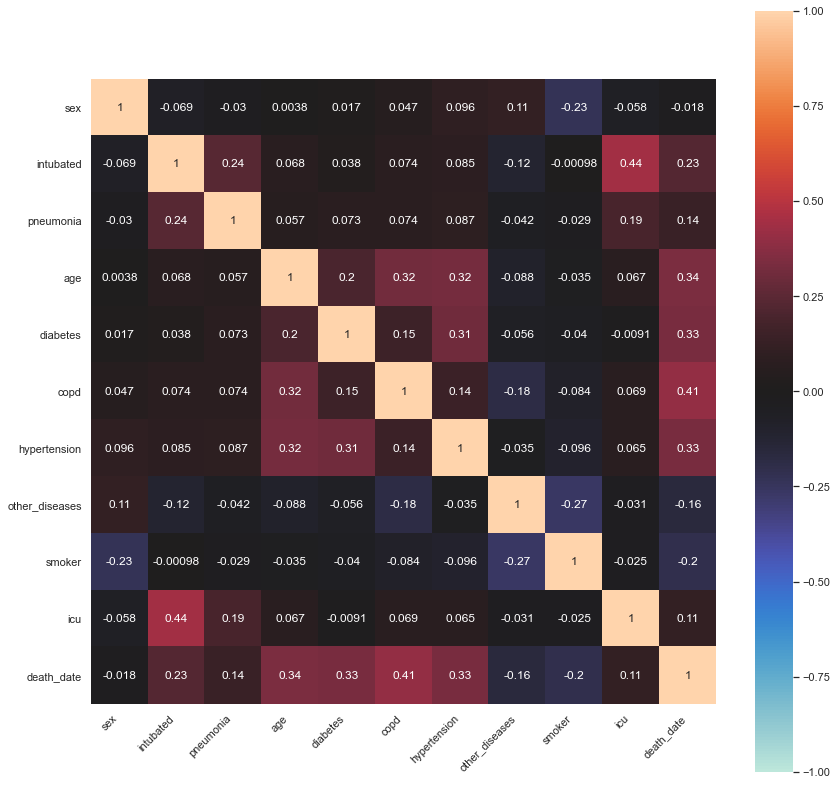

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(14,14)) 

corr = final_data.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    square=True,
    annot=True,
    ax=ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### There, now we have data that we can work with where 0 and 1 mean no and yes (male and female for sex). Let's build up our model

In [38]:
x_features = final_data.drop(columns=['death_date'])
y_labels = final_data['death_date']
x_features.head()

,sex,intubated,pneumonia,age,diabetes,copd,hypertension,other_diseases,smoker,icu
2,1,0,1,64,1,0,1,0,0,0
3,0,1,1,66,1,0,1,0,0,1
5,1,0,1,55,1,0,1,0,0,0
9,0,1,1,66,1,0,0,0,0,1
14,1,0,1,58,1,0,1,0,0,0


In [39]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

In [40]:
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_features_temp = x_features.values
# x_features_temp = scaler.fit_transform(x_features_temp)
x_train, x_test, y_train, y_test = train_test_split(x_features_temp, y_labels, test_size=0.20, random_state=1233)

In [42]:
x_train.shape

(878, 10)

In [43]:
from tensorflow.keras.callbacks import LearningRateScheduler
import math
def step_decay(epoch):
    initial_lrate=8e-4
    drop=0.5
    epochs_drop = 10
    lrate = initial_lrate*math.pow(drop,math.floor((1+epoch)/epochs_drop))
    return lrate

lrate = LearningRateScheduler(step_decay)

In [44]:
output_bias = tf.keras.initializers.Constant(np.log([y_labels.value_counts()[1]/y_labels.value_counts()[0]]))
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]
def make_model():
    model = Sequential()
    model.add(Dense(48, use_bias=False, input_shape=(10,)))
    model.add(LeakyReLU())
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(12,use_bias=False))
    model.add(LeakyReLU())
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid', bias_initializer=output_bias))
    model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=5e-4),
              metrics=METRICS)
    return model

In [45]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=52,
    mode='max',
    restore_best_weights=True)

In [46]:
x_train

array([[1, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [47]:
y_labels.value_counts()

0    586
1    512
Name: death_date, dtype: int64

In [48]:
y_test[:10]

781     1
1574    0
932     1
1166    0
1463    0
786     1
1368    0
1627    0
844     1
1632    0
Name: death_date, dtype: int64

In [49]:
model=make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                480       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 48)                0         
_________________________________________________________________
batch_normalization (BatchNo (None, 48)                192       
_________________________________________________________________
dropout (Dropout)            (None, 48)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)                576       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 12)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 12)                4

In [50]:
model.evaluate(x_train, y_train, verbose=0)[0]

4.722277433834206

In [51]:
model.save_weights("initial_weights.h5")

In [52]:
weight_for_0 = (1/y_labels.value_counts()[0]) * (len(y_labels))/2.0
weight_for_1 = (1/y_labels.value_counts()[1]) * (len(y_labels))/2.0
class_weight = {0: weight_for_0, 1: weight_for_1}

In [53]:
history = model.fit(x_train, y_train,
                   batch_size=64,
                   epochs=200,
                   verbose=0,
                   class_weight=class_weight,
                   callbacks=[early_stopping],
                   validation_data=(x_test, y_test))

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Restoring model weights from the end of the best epoch.
Epoch 00103: early stopping


In [54]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [55]:
def plot_metrics(history):
    metrics =  ['loss', 'auc', 'precision', 'recall']
    plt.figure(figsize=(9,9))
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(2,2,n+1)
        plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
        plt.plot(history.epoch, history.history['val_'+metric],
                 color=colors[0], linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
    if metric == 'loss':
        plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
        plt.ylim([0.8,1])
    else:
        plt.ylim([0,1])
    
    plt.legend()

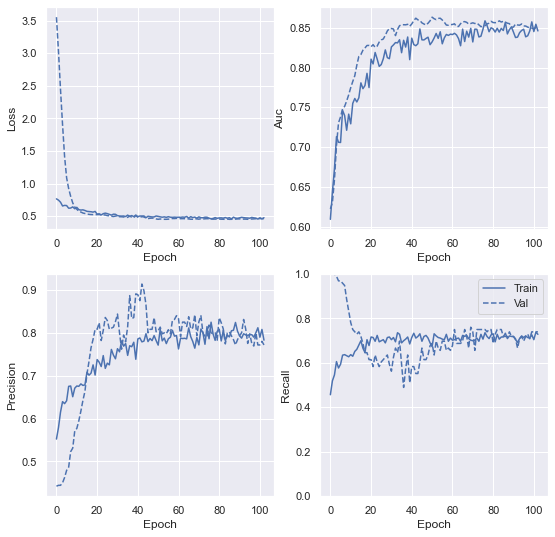

In [56]:
plot_metrics(history)

In [57]:
from sklearn.metrics import confusion_matrix
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
    print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
    print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
    print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
    print('Total Fraudulent Transactions: ', np.sum(cm[1]))

In [58]:
test_predictions_baseline = model.predict(x_test, batch_size=20)

In [59]:
x_features.std()

sex                0.484167
intubated          0.361033
pneumonia          0.461807
age               16.254060
diabetes           0.478513
copd               0.331643
hypertension       0.494196
other_diseases     0.457102
smoker             0.457102
icu                0.352986
dtype: float64

In [60]:
x_features.mean()

sex                0.374317
intubated          0.153916
pneumonia          0.692168
age               56.107468
diabetes           0.354281
copd               0.125683
hypertension       0.422587
other_diseases     0.296903
smoker             0.296903
icu                0.145719
dtype: float64

In [61]:
scaler.get_params()

{'copy': True, 'with_mean': True, 'with_std': True}

loss :  0.4469502459872853
tp :  66.0
fp :  16.0
tn :  108.0
fn :  30.0
accuracy :  0.7909091
precision :  0.80487806
recall :  0.6875
auc :  0.86349124

Legitimate Transactions Detected (True Negatives):  108
Legitimate Transactions Incorrectly Detected (False Positives):  16
Fraudulent Transactions Missed (False Negatives):  30
Fraudulent Transactions Detected (True Positives):  66
Total Fraudulent Transactions:  96


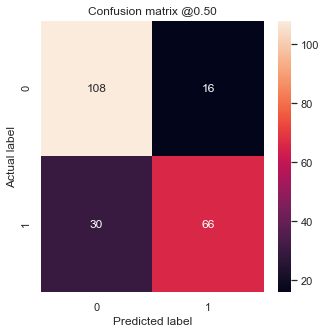

In [62]:
baseline_results = model.evaluate(x_test, y_test,
                                  batch_size=20, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
    print(name, ': ', value)
print()

plot_cm(y_test, test_predictions_baseline)

In [63]:
y_test.value_counts()

0    124
1     96
Name: death_date, dtype: int64

In [1095]:
model_json = model.to_json()
with open("death_final.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("death-weights_final.h5")

In [64]:
y_test.values[0:50]

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0], dtype=int64)

In [68]:
model.predict(np.expand_dims(x_test[0], axis=0))

array([[0.5963628]], dtype=float32)

In [65]:
x_test[1]

array([ 0,  0,  0, 54,  0,  0,  0,  0,  0,  0], dtype=int64)

In [66]:
x_features.columns

Index(['sex', 'intubated', 'pneumonia', 'age', 'diabetes', 'copd',
       'hypertension', 'other_diseases', 'smoker', 'icu'],
      dtype='object')

In [ ]:
import tensorflowjs as tfjs

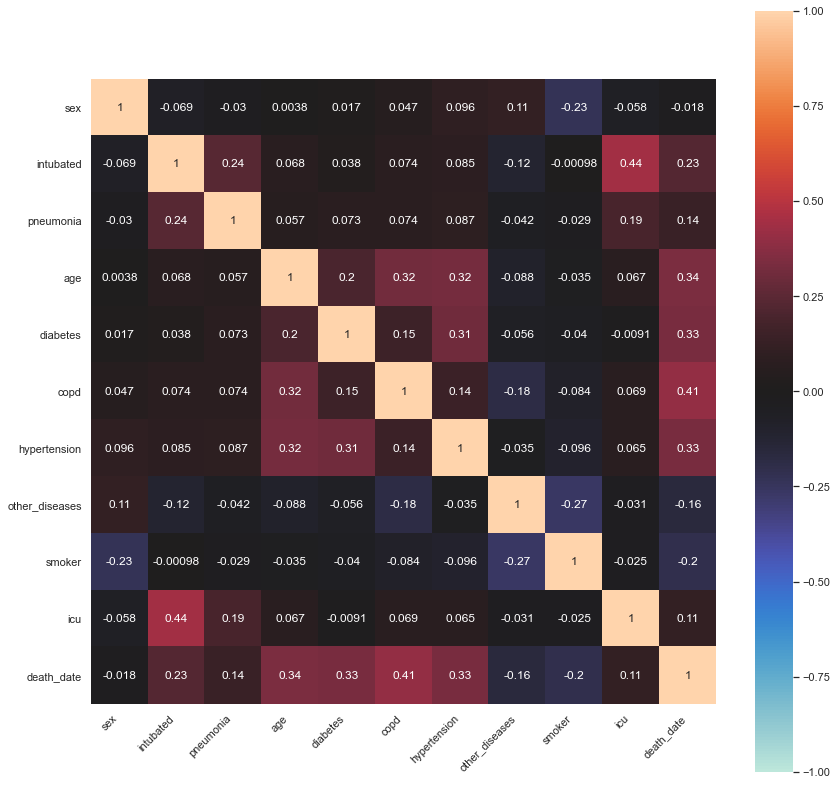

In [69]:
fig, ax = plt.subplots(figsize=(14,14)) 

corr = final_data.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    square=True,
    annot=True,
    ax=ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [71]:
import os
from tensorflow.keras.models import model_from_json

json_file = open('death_final.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("death-weights_final.h5")
loaded_model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=8e-4),
              metrics=METRICS)
score=model.evaluate(x_test, y_test)
print(score)

220/220 [==============================] - 0s 272us/sample - loss: 0.4470 - tp: 66.0000 - fp: 16.0000 - tn: 108.0000 - fn: 30.0000 - accuracy: 0.7909 - precision: 0.8049 - recall: 0.6875 - auc: 0.8635
[0.4469502486965873, 66.0, 16.0, 108.0, 30.0, 0.7909091, 0.80487806, 0.6875, 0.86349124]


In [72]:
loaded_predictions_baseline = loaded_model.predict(x_test, batch_size=20)

loss :  0.4469502459872853
tp :  66.0
fp :  16.0
tn :  108.0
fn :  30.0
accuracy :  0.7909091
precision :  0.80487806
recall :  0.6875
auc :  0.86349124

Legitimate Transactions Detected (True Negatives):  99
Legitimate Transactions Incorrectly Detected (False Positives):  25
Fraudulent Transactions Missed (False Negatives):  22
Fraudulent Transactions Detected (True Positives):  74
Total Fraudulent Transactions:  96


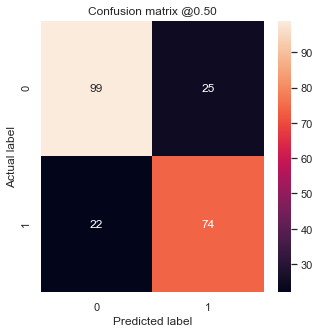

In [73]:
loaded_baseline_results = loaded_model.evaluate(x_test, y_test,
                                  batch_size=20, verbose=0)
for name, value in zip(loaded_model.metrics_names, baseline_results):
    print(name, ': ', value)
print()

plot_cm(y_test, loaded_predictions_baseline)

In [74]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(loaded_model, "tfjsmodel")

c:\users\ritesh\appdata\local\programs\python\python37\lib\site-packages\tensorflowjs\converters\keras_h5_conversion.py:122: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)
